# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [2]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
num_samples = 1000  

categories = ["Food", "Health", "Technology", "Fashion", "Sports"]
type_of_post = ["advertisement", "nunadvertisement"]

data = pd.DataFrame({
    'category': random.choices(categories, k=num_samples),  
    'likes': np.random.randint(10, 500, size=num_samples),  
    'shares': np.random.randint(1, 100, size=num_samples),  
    'comments': np.random.randint(1, 200, size=num_samples),  
    'post_time': pd.date_range(start="2020-01-01", periods=num_samples, freq="D"),
    'type_of_post': random.choices(type_of_post, k=num_samples),
})

data["positive_comments"] = data["comments"].apply(lambda x: np.random.randint(0, x+1))

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category           1000 non-null   object        
 1   likes              1000 non-null   int64         
 2   shares             1000 non-null   int64         
 3   comments           1000 non-null   int64         
 4   post_time          1000 non-null   datetime64[ns]
 5   type_of_post       1000 non-null   object        
 6   positive_comments  1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 54.8+ KB
None


In [11]:
data

,category,likes,shares,comments,post_time,type_of_post,positive_comments
0,Technology,179,64,10,2020-01-01,advertisement,2
1,Technology,148,37,13,2020-01-02,advertisement,1
2,Technology,332,92,74,2020-01-03,advertisement,44
3,Sports,241,64,131,2020-01-04,advertisement,37
4,Technology,227,23,146,2020-01-05,advertisement,143
...,...,...,...,...,...,...,...
995,Health,307,34,29,2022-09-22,nunadvertisement,17
996,Technology,138,37,165,2022-09-23,nunadvertisement,49
997,Food,152,44,169,2022-09-24,advertisement,44
998,Fashion,13,40,98,2022-09-25,advertisement,45


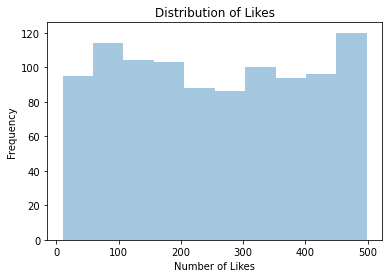

In [6]:
sns.distplot(data["likes"], bins=10, kde=False)  
plt.title("Distribution of Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")
plt.show()


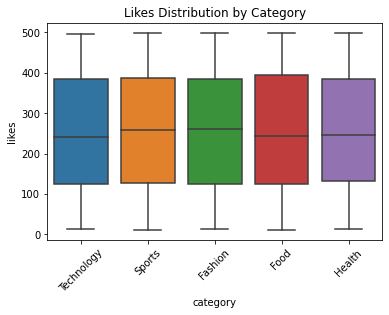

In [7]:
sns.boxplot(data=data, x="category", y="likes")
plt.title("Likes Distribution by Category")
plt.xticks(rotation=45) 
plt.show()

In [8]:
category_mean_likes = data.groupby("category")["likes"].mean()
print("\nMean Likes per Category:")
print(category_mean_likes)


Mean Likes per Category:
category
Fashion       256.307317
Food          256.182692
Health        260.961749
Sports        253.058511
Technology    251.004630
Name: likes, dtype: float64


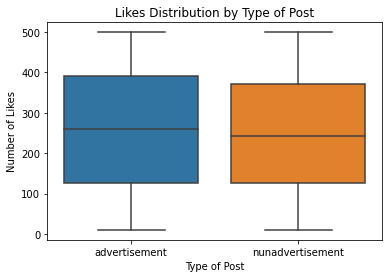

Mean Likes per Type of Post:
type_of_post
advertisement       259.194605
nunadvertisement    251.257796
Name: likes, dtype: float64


In [9]:
sns.boxplot(data=data, x="type_of_post", y="likes")
plt.title("Likes Distribution by Type of Post")
plt.xlabel("Type of Post")
plt.ylabel("Number of Likes")
plt.show()

mean_likes_per_type = data.groupby("type_of_post")["likes"].mean()
print("Mean Likes per Type of Post:")
print(mean_likes_per_type)


Correlation between Positive Comments and Likes: -0.03


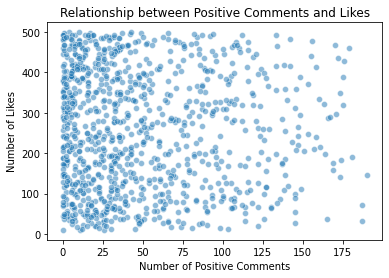

In [10]:
correlation = data["positive_comments"].corr(data["likes"])
print(f"Correlation between Positive Comments and Likes: {correlation:.2f}")

sns.scatterplot(data=data, x="positive_comments", y="likes", alpha=0.5)
plt.title("Relationship between Positive Comments and Likes")
plt.xlabel("Number of Positive Comments")
plt.ylabel("Number of Likes")
plt.show()

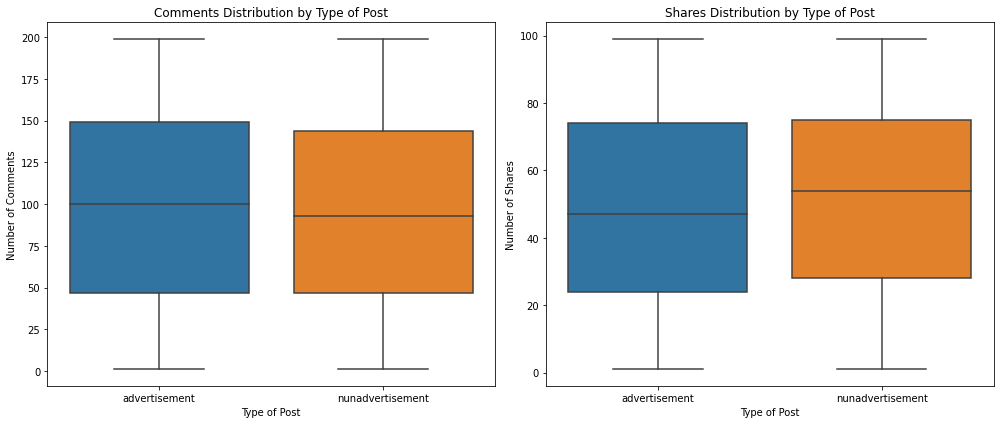

                  comments  shares
type_of_post                      
advertisement        97.02   48.50
nunadvertisement     95.98   51.72


In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=data, x="type_of_post", y="comments", ax=axes[0])
axes[0].set_title("Comments Distribution by Type of Post")
axes[0].set_xlabel("Type of Post")
axes[0].set_ylabel("Number of Comments")

sns.boxplot(data=data, x="type_of_post", y="shares", ax=axes[1])
axes[1].set_title("Shares Distribution by Type of Post")
axes[1].set_xlabel("Type of Post")
axes[1].set_ylabel("Number of Shares")

plt.tight_layout()
plt.show()

mean_comments_shares = data.groupby("type_of_post")[["comments", "shares"]].mean().round(2)

print(mean_comments_shares)
